# Churn Analysis :

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,auc,precision_score,recall_score,classification_report,roc_curve,roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier

# Data Ingestion :

In [2]:
churn = pd.read_csv('churn.csv')
churn.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
state                     3333 non-null object
account length            3333 non-null int64
area code                 3333 non-null int64
phone number              3333 non-null object
international plan        3333 non-null object
voice mail plan           3333 non-null object
number vmail messages     3333 non-null int64
total day minutes         3333 non-null float64
total day calls           3333 non-null int64
total day charge          3333 non-null float64
total eve minutes         3333 non-null float64
total eve calls           3333 non-null int64
total eve charge          3333 non-null float64
total night minutes       3333 non-null float64
total night calls         3333 non-null int64
total night charge        3333 non-null float64
total intl minutes        3333 non-null float64
total intl calls          3333 non-null int64
total intl charge         3333 non-null float64

**There are no null values.**

**Let's look that how many churners and non-churners does the dataset have?**

In [4]:
churn['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

In [5]:
churn.groupby(['churn']).mean()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
churn,,,,,,,,,,,,,,,,
False,100.793684,437.074737,8.604561,175.175754,100.283158,29.780421,199.043298,100.038596,16.918909,200.133193,100.058246,9.006074,10.158877,4.532982,2.743404,1.449825
True,102.664596,437.817805,5.115942,206.914079,101.335404,35.175921,212.410145,100.561077,18.054969,205.231677,100.399586,9.235528,10.700000,4.163561,2.889545,2.229814


**Churners make more customer service calls than non-churners.**

**Let's Count the number of churners and non-churners by State.**

In [6]:
print(churn.groupby('state')['churn'].value_counts())

state  churn
AK     False    49
       True      3
AL     False    72
       True      8
AR     False    44
                ..
WI     True      7
WV     False    96
       True     10
WY     False    68
       True      9
Name: churn, Length: 102, dtype: int64


# Exploratory Data Analysis :

### Visualize the distribution of 'Day_Mins'

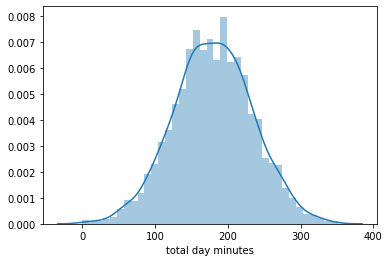

In [7]:
sns.distplot(churn['total day minutes'])
plt.show()

### Visualize the distribution of 'Eve_Mins'

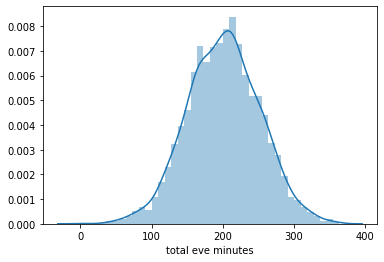

In [8]:
sns.distplot(churn['total eve minutes'])
plt.show()

### Visualize the distribution of 'Night_Mins'

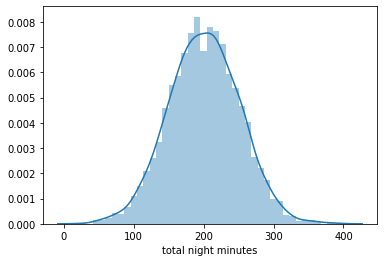

In [9]:
sns.distplot(churn['total night minutes'])
plt.show()

### Visualize the distribution of 'Intl_Mins'

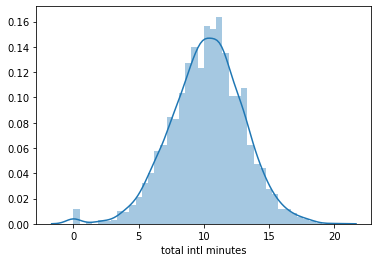

In [10]:
sns.distplot(churn['total intl minutes'])
plt.show()

**All of these features appear to be well approximated by the normal distribution. If this were not the case, we would have to consider applying a feature transformation of some kind.**

### Check for Outliers :

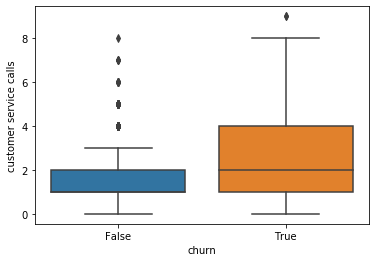

In [11]:
sns.boxplot(x = 'churn',y='customer service calls',data=churn)
plt.show()

There is a very noticeable difference here between churners and non-churners! Now, removing the outliers from the box plot.

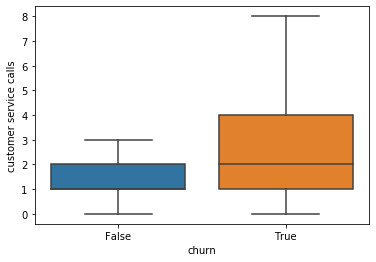

In [12]:
sns.boxplot(x = 'churn',y='customer service calls',data=churn,sym='')
plt.show()

**Visualize whether or not having a voice mail plan affects the number of customer service calls or churn.**

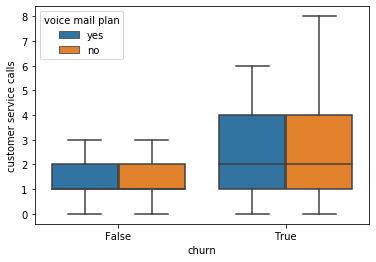

In [13]:
sns.boxplot(x = 'churn',y='customer service calls',data=churn,sym='',hue='voice mail plan')
plt.show()

* Not much of difference there.

**Visualize whether or not having a international plan affects the number of customer service calls or churn.**

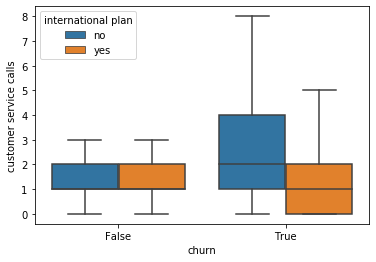

In [14]:
sns.boxplot(x = 'churn',y='customer service calls',data=churn,sym='',hue='international plan')
plt.show()

* It looks like customers who do churn end up leaving more customer service calls, unless these customers also have an international plan, in which case they leave fewer customer service calls. 
* This type of information is really useful in better understanding the drivers of churn. 

# Data Preprocessing :

In [15]:
# Replace 'no' with 0 and 'yes' with 1 in 'Voice mail Plan'
churn['voice mail plan'] = churn['voice mail plan'].replace({'no': 0 , 'yes': 1})

In [16]:
# Replace 'no' with 0 and 'yes' with 1 in 'churn'
churn['churn'] = churn['churn'].replace({False: 0 , True: 1})

In [17]:
# Replace 'no' with 0 and 'yes' with 1 in 'international plan'
churn['international plan'] = churn['international plan'].replace({'no':0,'yes':1})

In [18]:
# Performing one hot encoding on 'State'
churn=pd.get_dummies(data=churn,columns=['state'])

In [19]:
# dropping the unnecessary features
churn = churn.drop(churn[['area code','phone number']], axis=1)
churn.columns

Index(['account length', 'international plan', 'voice mail plan',
       'number vmail messages', 'total day minutes', 'total day calls',
       'total day charge', 'total eve minutes', 'total eve calls',
       'total eve charge', 'total night minutes', 'total night calls',
       'total night charge', 'total intl minutes', 'total intl calls',
       'total intl charge', 'customer service calls', 'churn', 'state_AK',
       'state_AL', 'state_AR', 'state_AZ', 'state_CA', 'state_CO', 'state_CT',
       'state_DC', 'state_DE', 'state_FL', 'state_GA', 'state_HI', 'state_IA',
       'state_ID', 'state_IL', 'state_IN', 'state_KS', 'state_KY', 'state_LA',
       'state_MA', 'state_MD', 'state_ME', 'state_MI', 'state_MN', 'state_MO',
       'state_MS', 'state_MT', 'state_NC', 'state_ND', 'state_NE', 'state_NH',
       'state_NJ', 'state_NM', 'state_NV', 'state_NY', 'state_OH', 'state_OK',
       'state_OR', 'state_PA', 'state_RI', 'state_SC', 'state_SD', 'state_TN',
       'state_TX', 'state

# Feature Engineering :

**Create a new feature - 'Avg_Night_Calls' - that is the result of dividing 'Night_Mins by 'Night_Calls'**

In [20]:
churn['avg_Night_Calls'] = churn['total night minutes'] / churn['total night calls']

In [21]:
churn['avg_Night_Calls'].head()

0    2.689011
1    2.469903
2    1.563462
3    2.212360
4    1.544628
Name: avg_Night_Calls, dtype: float64

# Over Sampling :

**The data is imbalnced with 85% and 15% nearly.**

In [22]:
X = churn.drop(columns=['churn'])
y = churn.churn

Using TensorFlow backend.


(3333, 69)
(5700, 69)


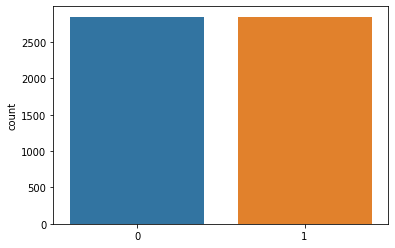

In [23]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2)

X_resampled, y_resampled = sm.fit_sample(X, y)

X_resampled = pd.DataFrame(X_resampled, columns=X.columns)

print(X.shape)
print(X_resampled.shape)

sns.countplot(y_resampled)
plt.show()

# Model Building :

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X_resampled,y_resampled,test_size=0.30,random_state=42)

In [25]:
sc = StandardScaler()
X_train_scaled= sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

## Logistic Regression :

In [26]:
lr =LogisticRegression()
lr.fit(X_train_scaled,y_train)
print('Training score =', lr.score(X_train_scaled, y_train))
print('Test score =', lr.score(X_test_scaled, y_test))

Training score = 0.8025062656641604
Test score = 0.7970760233918128


In [28]:
ypred_lr=lr.predict(X_test_scaled)
print(classification_report(y_test,ypred_lr))

              precision    recall  f1-score   support

           0       0.81      0.78      0.79       855
           1       0.79      0.81      0.80       855

    accuracy                           0.80      1710
   macro avg       0.80      0.80      0.80      1710
weighted avg       0.80      0.80      0.80      1710



## Decision Tree :

In [29]:
dt = DecisionTreeClassifier()
parameters = {'max_depth':range(1,10)},{'min_samples_split': (0.1,0.2,0.3,0.4,0.5)},
{'min_samples_leaf': range(1,10)},{'min_weight_fraction_leaf': (0.0,0.1,0.2)}
grid_obj = GridSearchCV(dt, param_grid = parameters)
grid_fit = grid_obj.fit(X_train_scaled,y_train)

best_dt = grid_fit.best_estimator_
best_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [30]:
dt1 = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
dt1.fit(X_train_scaled,y_train)
print('Decision Tree Training Score :',dt1.score(X_train_scaled,y_train))
print('Decision Tree Testing Score :',dt1.score(X_test_scaled,y_test))

Decision Tree Training Score : 0.9649122807017544
Decision Tree Testing Score : 0.9257309941520467


In [31]:
ypred_dt=dt1.predict(X_test_scaled)
print(classification_report(y_test,ypred_dt))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       855
           1       0.94      0.90      0.92       855

    accuracy                           0.93      1710
   macro avg       0.93      0.93      0.93      1710
weighted avg       0.93      0.93      0.93      1710



## KNN :

In [32]:
score = []
for k in range(1,100):   # running for different K values to know which yields the max accuracy. 
    clf = KNeighborsClassifier(n_neighbors = k,  weights = 'distance', p=1)
    clf.fit(X_train_scaled, y_train)
    score.append(clf.score(X_test_scaled, y_test ))

In [33]:
k_max = score.index(max(score))+1
print( "At K = {}, Max Accuracy = {}".format(k_max, max(score)*100))

At K = 1, Max Accuracy = 95.6140350877193


In [37]:
knn=KNeighborsClassifier(n_neighbors=1,weights='distance')
knn.fit(X_train_scaled,y_train)
print('KNN Training Score :',knn.score(X_train_scaled,y_train))
print('KNN Testing Score :',knn.score(X_test_scaled,y_test))

KNN Training Score : 1.0
KNN Testing Score : 0.9456140350877194


In [71]:
ypred_knn=knn.predict(X_test_scaled)
print(classification_report(y_test,ypred_knn))

              precision    recall  f1-score   support

           0       0.98      0.91      0.94       855
           1       0.92      0.98      0.95       855

    accuracy                           0.95      1710
   macro avg       0.95      0.95      0.95      1710
weighted avg       0.95      0.95      0.95      1710



**Here KNN Classifier is Overfit Model**

## Random Forest :

In [39]:
rf = RandomForestClassifier(random_state=42)
estimators = np.arange(10, 200, 2)
scores = []
for n in estimators:
    rf.set_params(n_estimators=n)
    rf.fit((X_train_scaled), y_train)
    scores.append(rf.score((X_test_scaled), y_test))
print(scores)

[0.9432748538011696, 0.9467836257309942, 0.9497076023391813, 0.9497076023391813, 0.9532163742690059, 0.956140350877193, 0.9567251461988304, 0.9590643274853801, 0.9578947368421052, 0.9549707602339181, 0.9567251461988304, 0.9555555555555556, 0.956140350877193, 0.9555555555555556, 0.9578947368421052, 0.9590643274853801, 0.9578947368421052, 0.9614035087719298, 0.9596491228070175, 0.9578947368421052, 0.9584795321637427, 0.9596491228070175, 0.9608187134502923, 0.960233918128655, 0.9596491228070175, 0.9590643274853801, 0.960233918128655, 0.9596491228070175, 0.9578947368421052, 0.9590643274853801, 0.9573099415204679, 0.9590643274853801, 0.9590643274853801, 0.9584795321637427, 0.9584795321637427, 0.9584795321637427, 0.9573099415204679, 0.9590643274853801, 0.960233918128655, 0.960233918128655, 0.9590643274853801, 0.9590643274853801, 0.9590643274853801, 0.9596491228070175, 0.9596491228070175, 0.9596491228070175, 0.9619883040935673, 0.9614035087719298, 0.9619883040935673, 0.9619883040935673, 0.961

In [40]:
estimators[scores.index(max(scores))]

192

In [50]:
param_dist = {'n_estimators': [192],'max_depth': [2, 3, 4,5,6,7,8,10],'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', 'log2', None]}

cv_rf = GridSearchCV(rf, cv = 5 ,param_grid=param_dist, n_jobs = 3)
cv_rf.fit(X_train_scaled,y_train)
cv_rf.best_params_
print('RF Training Score :',cv_rf.score(X_train_scaled,y_train))
print('RF Testing Score :',cv_rf.score(X_test_scaled,y_test))

RF Training Score : 0.9719298245614035
RF Testing Score : 0.9438596491228071


In [51]:
cv_rf.best_params_

{'bootstrap': False,
 'max_depth': 10,
 'max_features': 'auto',
 'n_estimators': 192}

In [68]:
ypred_rf=cv_rf.predict(X_test_scaled)
print(classification_report(y_test,ypred_rf))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       855
           1       0.96      0.93      0.94       855

    accuracy                           0.94      1710
   macro avg       0.94      0.94      0.94      1710
weighted avg       0.94      0.94      0.94      1710



## Gradient Boosting :

In [52]:
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=100, learning_rate = learning_rate, max_depth = 10, random_state = 1)
    gb.fit(X_train_scaled, y_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train_scaled, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(X_test_scaled, y_test)))
    print()

Learning rate:  0.05
Accuracy score (training): 1.000
Accuracy score (validation): 0.955

Learning rate:  0.1
Accuracy score (training): 1.000
Accuracy score (validation): 0.959

Learning rate:  0.25
Accuracy score (training): 1.000
Accuracy score (validation): 0.964

Learning rate:  0.5
Accuracy score (training): 1.000
Accuracy score (validation): 0.960

Learning rate:  0.75
Accuracy score (training): 1.000
Accuracy score (validation): 0.949

Learning rate:  1
Accuracy score (training): 1.000
Accuracy score (validation): 0.950



In [69]:
ypred_gb=gb.predict(X_test_scaled)
print(classification_report(y_test,ypred_gb))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       855
           1       0.95      0.95      0.95       855

    accuracy                           0.95      1710
   macro avg       0.95      0.95      0.95      1710
weighted avg       0.95      0.95      0.95      1710



**Overfit Model**

## XG Boost :

In [53]:
xgb=XGBClassifier(max_depth=10)
xgb.fit(X_train_scaled,y_train)
print('XGB Training Score :',xgb.score(X_train_scaled,y_train))
print('XGB Testing Score :',xgb.score(X_test_scaled,y_test))

XGB Training Score : 0.9997493734335839
XGB Testing Score : 0.9631578947368421


In [54]:
ypred_xgb=xgb.predict(X_test_scaled)
print(classification_report(y_test,ypred_xgb))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       855
           1       0.97      0.96      0.96       855

    accuracy                           0.96      1710
   macro avg       0.96      0.96      0.96      1710
weighted avg       0.96      0.96      0.96      1710



## Stacking :

In [56]:
estimators = [('rf', RandomForestClassifier(n_estimators=192, random_state=42)),
              ('dt', DecisionTreeClassifier(max_depth=9,criterion='gini')),
              ('xgb',XGBClassifier())]
clf = StackingClassifier(estimators=estimators,final_estimator=RandomForestClassifier())
clf.fit(X_train_scaled,y_train)
print('Stacking Training Score :',clf.score(X_train_scaled,y_train))
print('Stacking Testing Score :',clf.score(X_test_scaled,y_test))

Stacking Training Score : 0.9977443609022556
Stacking Testing Score : 0.9690058479532164


In [57]:
ypred_clf=clf.predict(X_test_scaled)
print(classification_report(y_test,ypred_clf))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       855
           1       0.97      0.97      0.97       855

    accuracy                           0.97      1710
   macro avg       0.97      0.97      0.97      1710
weighted avg       0.97      0.97      0.97      1710



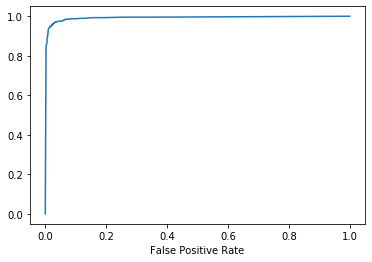

In [64]:
# Generate the probabilities
y_pred_prob = clf.predict_proba(X_test_scaled)[:, 1]

# Calculate the roc metrics
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot the ROC curve
plt.plot(fpr, tpr)

# Add labels and diagonal line
plt.xlabel("False Positive Rate")
plt.show()

In [61]:
# Print the AUC
print(roc_auc_score(y_test, y_pred_prob))

0.9922943811771143


# Observations : 

In [72]:
precision1=precision_score(y_test,ypred_lr)
precision2=precision_score(y_test,ypred_dt)
precision3=precision_score(y_test,ypred_knn)
precision4=precision_score(y_test,ypred_rf)
precision5=precision_score(y_test,ypred_gb)
precision6=precision_score(y_test,ypred_xgb)
precision7=precision_score(y_test,ypred_clf)

print('precision1',precision1)
print('precision2',precision2)
print('precision3',precision3)
print('precision4',precision4)
print('precision5',precision5)
print('precision6',precision6)
print('precision7',precision7)

precision1 0.7879818594104309
precision2 0.9449877750611247
precision3 0.9177631578947368
precision4 0.9611178614823815
precision5 0.9497663551401869
precision6 0.9669811320754716
precision7 0.9706572769953051


In [74]:
recall1=recall_score(y_test,ypred_lr)
recall2=recall_score(y_test,ypred_dt)
recall3=recall_score(y_test,ypred_knn)
recall4=recall_score(y_test,ypred_rf)
recall5=recall_score(y_test,ypred_gb)
recall6=recall_score(y_test,ypred_xgb)
recall7=recall_score(y_test,ypred_clf)

print('recall1',recall1)
print('recall2',recall2)
print('recall3',recall3)
print('recall4',recall4)
print('recall5',recall5)
print('recall6',recall6)
print('recall7',recall7)

recall1 0.8128654970760234
recall2 0.904093567251462
recall3 0.9789473684210527
recall4 0.9251461988304094
recall5 0.9508771929824561
recall6 0.9590643274853801
recall7 0.9672514619883041


In [76]:
Algorithm=['LogisticRegression','Decision Tree','KNN','RandomForest','GradientBoosting','XGBoosting','Stacking']
Precision=[precision1,precision2,precision3,precision4,precision5,precision6,precision7]
Recall=[recall1,recall2,recall3,recall4,recall5,recall6,recall7]
Train_Accuracy=[0.80,0.96,1.0,0.97,1.0,0.99,0.99]
Test_Accuracy=[0.78,0.93,0.96,0.94,0.96,0.96,0.97]

In [77]:
df = pd.DataFrame({'Algorithm': Algorithm,'Train_Accuracy': Train_Accuracy,'Test_Accuracy':Test_Accuracy,'Precision': Precision,'Recall': Recall})
df

,Algorithm,Train_Accuracy,Test_Accuracy,Precision,Recall
0,LogisticRegression,0.80,0.78,0.787982,0.812865
1,Decision Tree,0.96,0.93,0.944988,0.904094
2,KNN,1.00,0.96,0.917763,0.978947
3,RandomForest,0.97,0.94,0.961118,0.925146
4,GradientBoosting,1.00,0.96,0.949766,0.950877
5,XGBoosting,0.99,0.96,0.966981,0.959064
6,Stacking,0.99,0.97,0.970657,0.967251


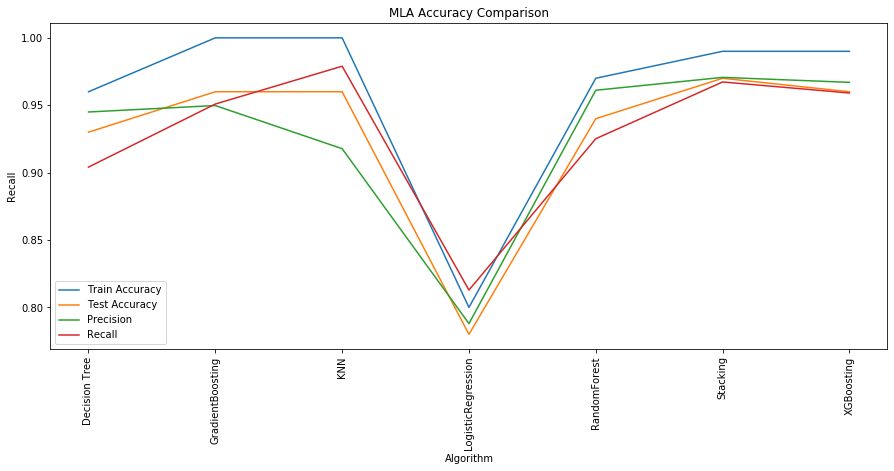

In [79]:
plt.subplots(figsize=(15,6))
sns.lineplot(x="Algorithm", y="Train_Accuracy",data=df,palette='hot',label='Train Accuracy')
sns.lineplot(x="Algorithm", y="Test_Accuracy",data=df,palette='hot',label='Test Accuracy')
sns.lineplot(x="Algorithm", y="Precision",data=df,palette='hot',label='Precision')
sns.lineplot(x="Algorithm", y="Recall",data=df,palette='hot',label='Recall')

plt.xticks(rotation=90)
plt.title('MLA Accuracy Comparison')
plt.legend()
plt.show()

**Stacking and Random Forest has been performed well**

**Precision is more in Stacking.**